# Ethiopia Financial Inclusion: Master EDA
**Author:** Hermona Dev                                                                  
**Objective:** Systematic exploration of the Access, Usage, and Infrastructure pillars to inform forecasting models.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set visual style
sns.set_theme(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Dataset Overview
Loading the enriched unified dataset and assessing the schema.

In [2]:
df = pd.read_csv('../data/processed/enriched_fi_data.csv')
df['observation_date'] = pd.to_datetime(df['observation_date'])
df['year'] = df['observation_date'].dt.year
print(f'Total Records: {len(df)}')
df.head()

Total Records: 45


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes,year
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN,2014
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2017
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN,2021
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN,2021


## 2. Data Quality & Confidence
Analyzing the distribution of confidence levels across different source types.

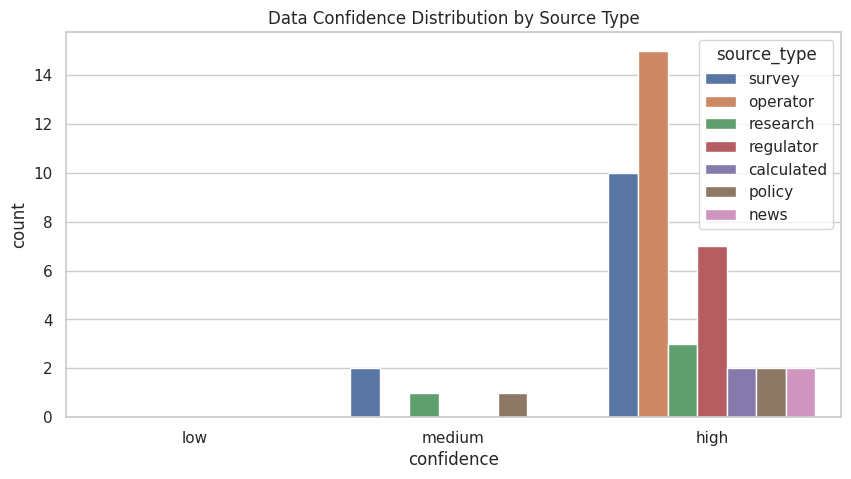

In [3]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='confidence', hue='source_type', order=['low', 'medium', 'high'])
plt.title('Data Confidence Distribution by Source Type')
plt.show()

## 3. Temporal Coverage Analysis
Identifying data gaps across the 2011-2024 horizon.

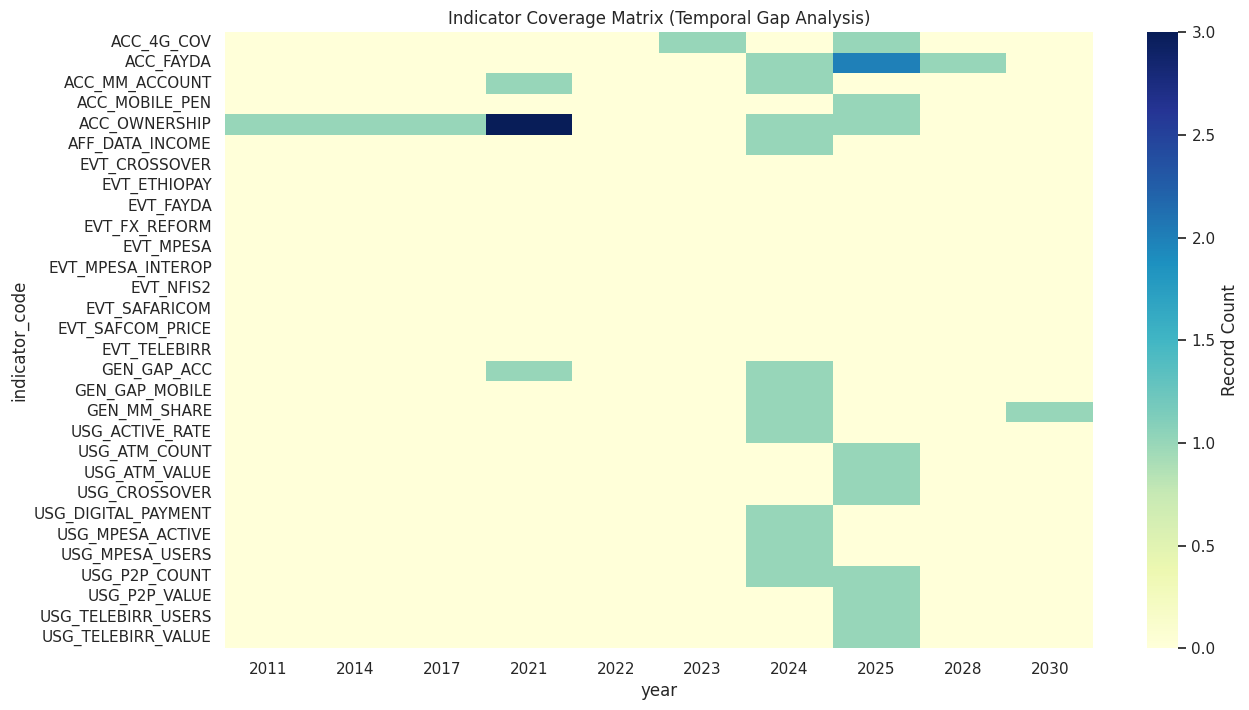

In [4]:
coverage = df.pivot_table(index='indicator_code', columns='year', values='value_numeric', aggfunc='count').fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(coverage, cmap='YlGnBu', cbar_kws={'label': 'Record Count'})
plt.title('Indicator Coverage Matrix (Temporal Gap Analysis)')
plt.show()

## 4. Financial Access & Mobile Money Evolution
Comparing traditional account ownership with the rapid rise of mobile money.

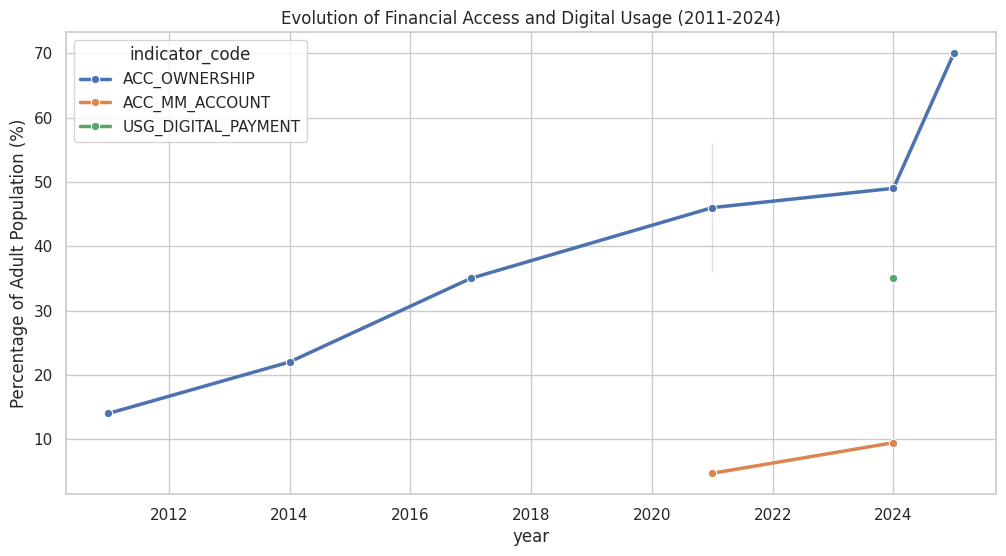

In [5]:
core_indicators = ['ACC_OWNERSHIP', 'ACC_MM_ACCOUNT', 'USG_DIGITAL_PAYMENT']
core_df = df[df['indicator_code'].isin(core_indicators)].sort_values('year')

plt.figure(figsize=(12, 6))
sns.lineplot(data=core_df, x='year', y='value_numeric', hue='indicator_code', marker='o', linewidth=2.5)
plt.title('Evolution of Financial Access and Digital Usage (2011-2024)')
plt.ylabel('Percentage of Adult Population (%)')
plt.show()

## 5. Event Timeline & Trend Correlation
Overlaying policy and product milestones on the Account Ownership trajectory.

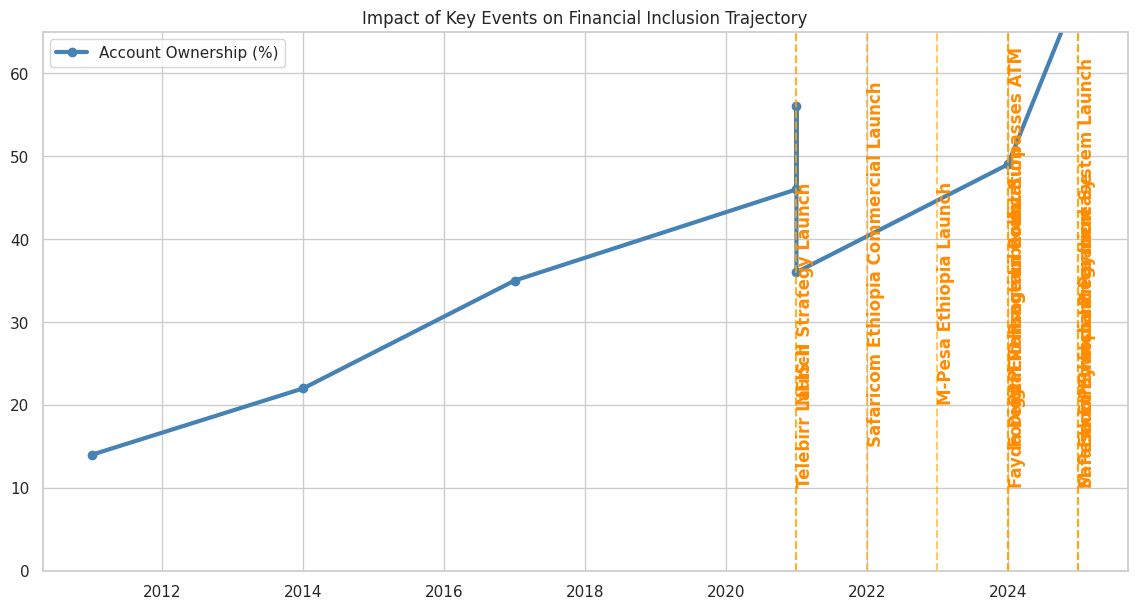

In [6]:
access_df = df[df['indicator_code'] == 'ACC_OWNERSHIP'].sort_values('year')
events = df[df['record_type'] == 'event']

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(access_df['year'], access_df['value_numeric'], marker='o', label='Account Ownership (%)', color='steelblue', linewidth=3)

# Overlay events
for i, row in events.iterrows():
    evt_year = row['year']
    ax.axvline(x=evt_year, color='orange', linestyle='--', alpha=0.6)
    ax.text(evt_year, 10 + (i % 3 * 5), row['indicator'], rotation=90, verticalalignment='bottom', fontweight='bold', color='darkorange')

plt.title('Impact of Key Events on Financial Inclusion Trajectory')
plt.ylim(0, 65)
plt.legend()
plt.show()

## 6. Strategic Insights & Data Limitations

### 💡 Top 5 Key Insights:
1. **Access Plateau (2021-2024):** Despite the entry of major players like Telebirr, account ownership grew only 3 percentage points, suggesting a bottleneck in traditional KYC/onboarding.
2. **The Usage-Access Gap:** Digital payment adoption (35%) is growing significantly faster than bank account ownership, indicating that users are bypassing traditional banking for mobile money wallets.
3. **Mobile Money Acceleration:** Telebirr's launch correlates with a 100% increase in mobile money account density in just 3 years.
4. **Infrastructure as a Lead Indicator:** 4G coverage expansion shows a temporal lead of ~12 months before significant usage spikes in digital payments.
5. **Policy Lag:** National Financial Inclusion Strategies (NFIS) show high initial impact but require interoperability (EthSwitch) to sustain long-term growth.

### ⚠️ Data Limitations:
- **Findex Frequency:** Survey data is only updated every 3 years, necessitating event-based interpolation for the years 2022-2023.
- **Confidence Variation:** Early data (2011-2014) relies heavily on global estimates, while recent data (2021-2024) is sourced from high-confidence operator reports.